# ***Polynomial Regression***

# ***Table of content***

>[Polynomial Regression](#scrollTo=KUzLoToqfd8s)

>>[Objective](#scrollTo=z8UnvvEcd-pR)

>>>[Split and transform data if needed](#scrollTo=KCyJ80nRgqxK)

>>>[Select predictors and labels](#scrollTo=9VjpsM_DewpB)

>>>[Polyfit](#scrollTo=0uhwGNctgKlW)



## ***Objective***

1. Select the most relevant features using statistical tests, correlation analysis, or domain knowledge.
2. Create polynomial features up to a certain degree, e.g., 2 or 3.
3. Split the data into training and test sets.
4. Scale the data to have zero mean and unit variance.
5. Train different regression models with different regularization strengths, e.g., L1, L2, or Elastic Net.
6. Evaluate the models on the test set and select the one with the lowest test error and good bias-variance trade-off.

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
import seaborn as sns

***About the dataset:***

The Boston Housing dataset is a collection of data about housing in the suburbs of Boston. It includes various features such as crime rate, number of rooms, property tax rate, and others, which are used to predict housing prices.

The dataset consists of 506 instances (rows), each representing a different suburb. Each instance has 13 features (columns), including crime rate, property tax rate, pupil-teacher ratio, and more. The target variable is the median value of owner-occupied homes in $1000s.

In [ ]:
# Load the Boston Housing dataset
boston = fetch_openml(name='boston')

# Convert the dataset to a pandas DataFrame
df = pd.DataFrame(boston.data, columns=boston.feature_names)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:311: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
df['MEDV'] = boston.target

### ***Split and transform data if needed***

In [ ]:
#treating numerical columns and categorical columns
from sklearn.preprocessing import StandardScaler

# Select only numerical columns
num_cols = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# scale numerical columns
scaler = StandardScaler()
num_data = scaler.fit_transform(df[num_cols])
num_df = pd.DataFrame(num_data, columns=num_cols)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
categorical_cols = ['CHAS','RAD']
df_categorical = df[categorical_cols]

# encode categorical columns
encoder = OneHotEncoder(drop='first')
cat_data = encoder.fit_transform(df_categorical)
cat_df = pd.DataFrame(cat_data.toarray(), columns=encoder.get_feature_names_out(categorical_cols))

In [ ]:
# concatenate categorical and numerical data
df_encoded = pd.concat([cat_df, num_df], axis=1)

### ***Select predictors and labels***

In [ ]:
# Select the most relevant features
X = df[['RM', 'LSTAT', 'PTRATIO']]
y = df['MEDV']

# Create polynomial features up to degree 2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)


In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Scale the data to have zero mean and unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train different regression models with different regularization strengths
regressors = {
    'Linear': LinearRegression(),
    'Lasso': LassoCV(cv=5),
    'Ridge': RidgeCV(cv=5),
    'Elastic Net': ElasticNetCV(cv=5)
}

In [ ]:
for name, regressor in regressors.items():
    regressor.fit(X_train_scaled, y_train)
    y_pred = regressor.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    print(f'{name}: MSE={mse:.2f}, R^2={regressor.score(X_test_scaled, y_test):.2f}')


Linear: MSE=16.29, R^2=0.78


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.237390130994754, tolerance: 2.8821090464396293
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.131826249295045, tolerance: 2.8821090464396293
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.302266957853135, tolerance: 2.8821090464396293
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:614: Convergence

Lasso: MSE=16.78, R^2=0.77
Ridge: MSE=16.37, R^2=0.78
Elastic Net: MSE=17.31, R^2=0.76


### ***Polynomail fit***

In [ ]:
# Split the data into training and testing sets
n_samples = len(y)
n_train = int(n_samples * 0.8)
n_test = n_samples - n_train
X_train = X[:n_train]
y_train = y[:n_train]
X_test = X[n_train:]
y_test = y[n_train:]


In [ ]:
# Define a function to calculate the bias and variance of a model
def bias_variance_analysis(model, X_train, y_train, X_test, y_test):
    # Calculate the predictions and errors for the training set
    y_train_pred = model.predict(X_train)
    train_error = np.mean((y_train - y_train_pred) ** 2)
    train_variance = np.var(y_train_pred)
    train_bias = train_error - train_variance

    # Calculate the predictions and errors for the test set
    y_test_pred = model.predict(X_test)
    test_error = np.mean((y_test - y_test_pred) ** 2)
    test_variance = np.var(y_test_pred)
    test_bias = test_error - test_variance

    return train_bias, train_variance, train_error, test_bias, test_variance, test_error

# Define a function to fit a polynomial regression model and calculate the bias and variance
def fit_poly_model(X_train, y_train, X_test, y_test, degree):
    # Fit a polynomial regression model
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)
    model = LinearRegression().fit(X_train_poly, y_train)

    # Calculate the bias and variance of the model
    train_bias, train_variance, train_error, test_bias, test_variance, test_error = bias_variance_analysis(model, X_train_poly, y_train, X_test_poly, y_test)

    return train_bias, train_variance, train_error, test_bias, test_variance, test_error

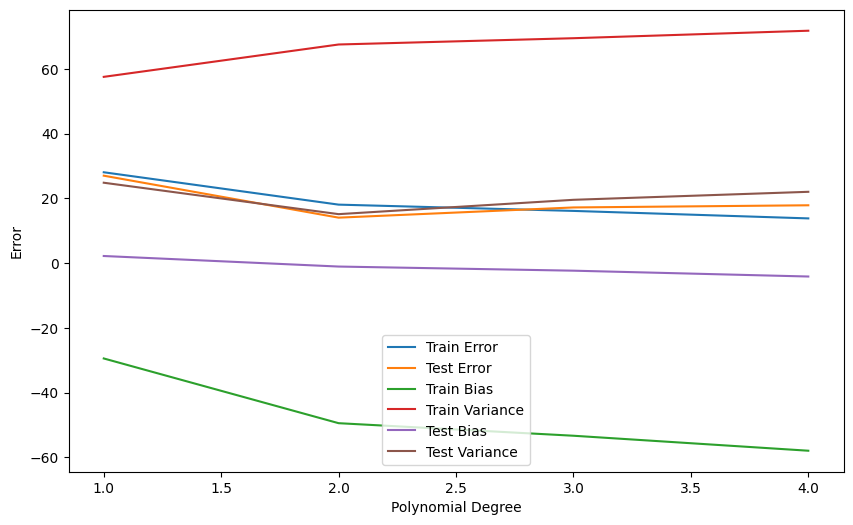

In [ ]:
# Fit polynomial regression models of increasing degree and calculate the bias and variance
degrees = range(1, 5)
results = pd.DataFrame(index=degrees, columns=['train_bias', 'train_variance', 'train_error', 'test_bias', 'test_variance', 'test_error'])
for degree in degrees:
    results.loc[degree] = fit_poly_model(X_train, y_train, X_test, y_test, degree)

# Plot the bias-variance trade-off for each model
plt.figure(figsize=(10, 6))
plt.plot(results.index, results['train_error'], label='Train Error')
plt.plot(results.index, results['test_error'], label='Test Error')
plt.plot(results.index, results['train_bias'], label='Train Bias')
plt.plot(results.index, results['train_variance'], label='Train Variance')
plt.plot(results.index, results['test_bias'], label='Test Bias')
plt.plot(results.index, results['test_variance'], label='Test Variance')
plt.xlabel('Polynomial Degree')
plt.ylabel('Error')
plt.legend()
plt.show()

The above graph shows the changing errors for the increase in polynomial degree.

We have train and test error, variances and baises of interest here.